## **Exploratory Data Analysis on Airbnb Dataset 😇**

**Objective:** Conduct an exploratory data analysis (EDA) on a dataset of Airbnb listings to gain insights into the factors affecting rental prices and customer satisfaction.

**Tasks:**

- Import and clean the dataset: Handle missing values, remove duplicates, and perform necessary data transformations.
- Conduct descriptive statistics analysis: Calculate mean, median, mode, variance, and standard deviation for numerical variables
- Visualize the data: Create appropriate visualizations (e.g., histograms, boxplots, bar charts) to analyze the distribution of numerical variables and the relationships between categorical and numerical variables.
- Analyze geographical data: Create a heatmap to visualize the density of listings across New York City neighborhoods. Identify areas with the highest concentration of Airbnb listings.
- Investigate the relationship between room type, neighborhood group, and price. Perform appropriate statistical tests (e.g., t-test, ANOVA) to determine if there are significant differences in rental prices based on room type and neighborhood group.
- Analyze the relationship between customer satisfaction (as measured by the number of reviews and reviews_per_month) and factors such as price, room type, and neighborhood group.
- Based on your findings, provide recommendations to Airbnb hosts on how to improve customer satisfaction and increase rental prices. Consider potential strategies such as offering different room types, targeting specific neighborhoods, or adjusting pricing based on demand and competition.

In [157]:
#importing necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [158]:
#Loading data set
df = pd.read_csv('Data\Raw\AB_NYC_2019.csv')

In [236]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


### **Understanding The Data 🤔**

In [160]:
#Checking the shape of our data set
df.shape

(48895, 16)

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Here we have almost 48.8k rows with 16 columns and It is composed of 3 float types, 7 int types and 6 object types.

## **Data Cleaning 🫧**

In [162]:
#checking Null values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

we can see there are 10052 null values in the last_review and reviews_per_month columns and a very few null values in name and host_name.

In [163]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


- From this we can see the mean price to be around 152 dollars.

- Average availability of an airbnb around a year is 112 days.

In [164]:
#Checking whether there are any Unique Values or not
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [165]:
#checking if any duplicate values are present
df.duplicated().sum()

0

we don't have any duplicate values 🥳

In [166]:
# We are removing the unwanted columns id,name , host_name and last_review doesn't help us in anyway in our approach.
df.drop(['name','host_name','host_id','id','last_review'], axis=1, inplace=True)
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [167]:
df.isna().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

We can actually fill all the null values of reviews_per_month with 0 where it have null values because the data is null only because no one has reviewed it and hence the number of review is 0 here.

In [168]:
# Missing value implies there are no reviews for the location.
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [169]:
df.isna().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [170]:
df.to_csv('Data\Clean\cleaned_data.csv', index=False)


## **EDA 🙂**

- Room Type

In [171]:
#the room_type is only have 3 particular types.
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

<AxesSubplot: ylabel='room_type'>

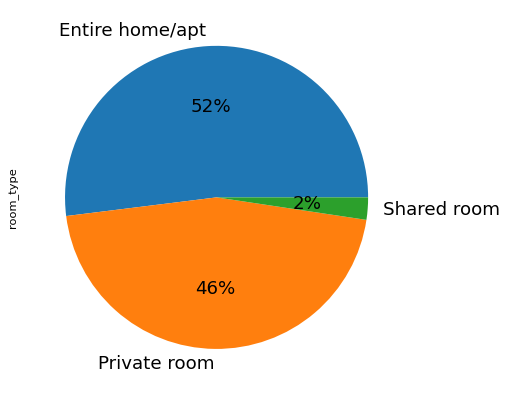

In [172]:
fig = plt.figure(figsize=(6,6), dpi=82)
df['room_type'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=16)

It's interesting to see that in our dataset, more than half of the people (52%) prefer to use a house on Airbnb, while 46% opt for a private room. Only a small fraction, 2%, chose a shared room. This could indicate that most people who use Airbnb are likely traveling with their family or friends for vacations, tours, or visits. Overall, it's helpful to know this information to better understand the needs and preferences of Airbnb users.

- **Neighborhood Groups**

In [173]:
# There are 5 different locations
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

<AxesSubplot: ylabel='neighbourhood_group'>

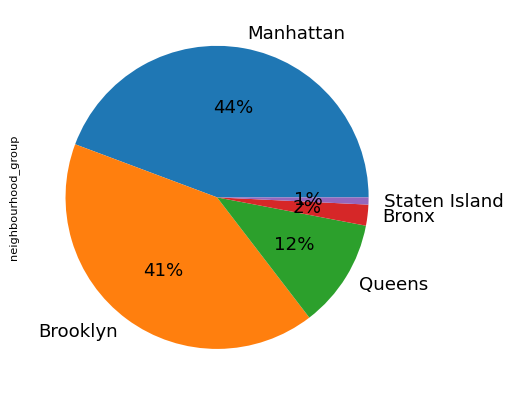

In [174]:
fig = plt.figure(figsize=(6,6), dpi=82)
df['neighbourhood_group'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=16)

According to the data, Manhattan seems to be the most popular destination for Airbnb rentals, accounting for a whopping 44% of all transactions. Following closely behind is Brooklyn, which represents 41% of the total transactions, followed by Queens with 12%, and the Bronx with only 2%. On the other hand, Staten Island appears to be the least popular destination with only 1% of the total Airbnb transactions.

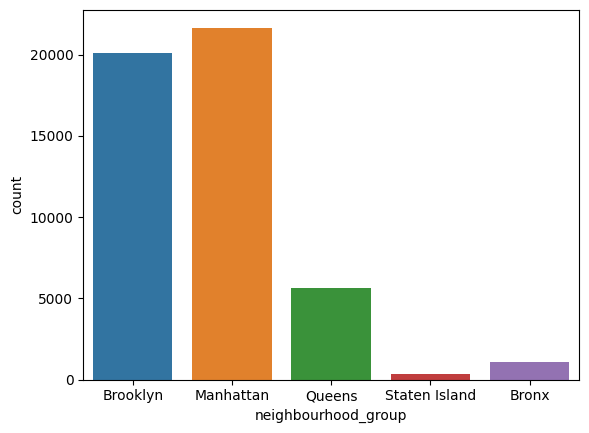

In [175]:
#creating barchart
sns.countplot(x = 'neighbourhood_group', data = df)
plt.show()

In [176]:
df[['neighbourhood_group','price']]

,neighbourhood_group,price
0,Brooklyn,149
1,Manhattan,225
2,Manhattan,150
3,Brooklyn,89
4,Manhattan,80
...,...,...
48890,Brooklyn,70
48891,Brooklyn,40
48892,Manhattan,115
48893,Manhattan,55


In [177]:
df.groupby('neighbourhood_group')['price'].mean()

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

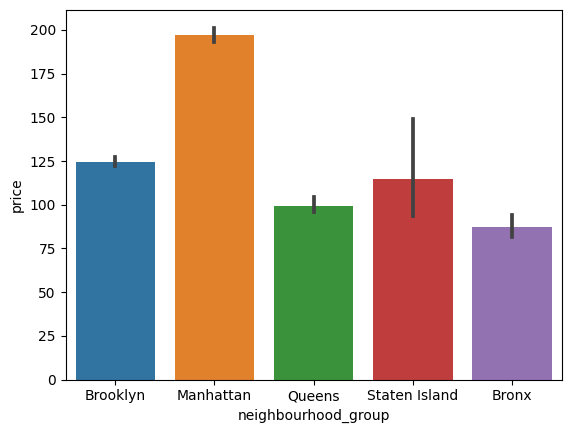

In [178]:
# average price in neighbourhood_group
sns.barplot(x = 'neighbourhood_group', y = 'price', data = df)
plt.show()

C:\Users\Kartik Dhiman\AppData\Local\Temp\ipykernel_17000\778902614.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.




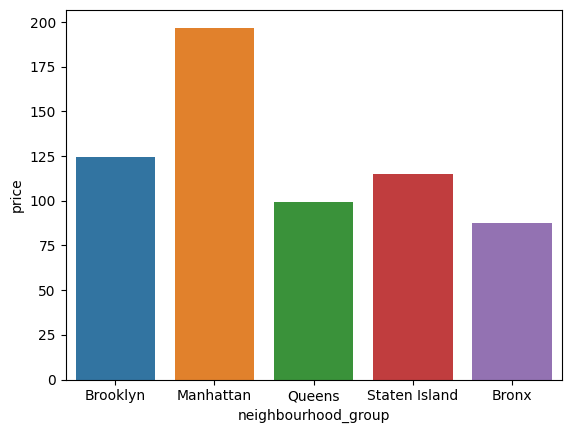

In [179]:
# average price in neighbourhood_group %confidence intervals
sns.barplot(x = 'neighbourhood_group', y = 'price', data = df, ci = False)
plt.show()

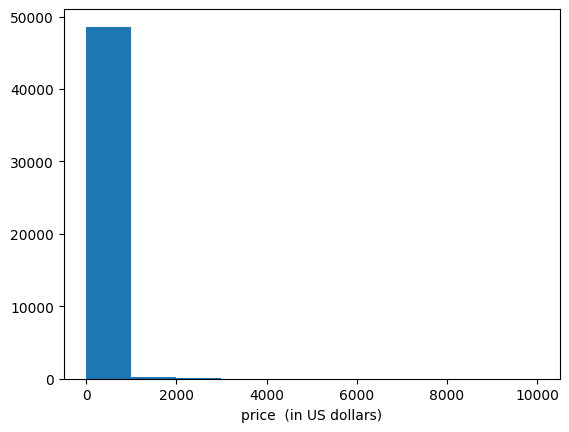

In [180]:
#histogram price vs count
plt.hist(df['price'])
plt.xlabel('price  (in US dollars)')
plt.show()

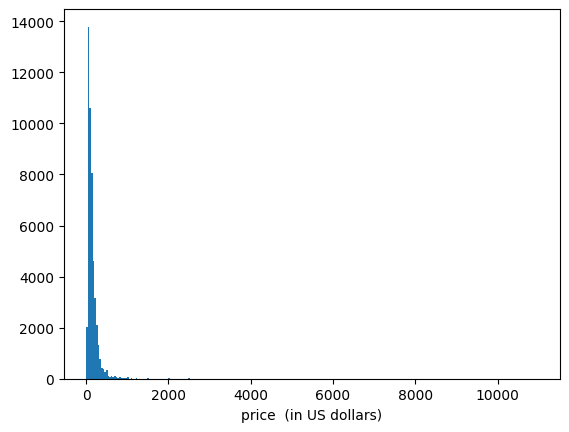

In [181]:
#adjust x label using np from numpy (arange(X = left value, Y = right value, Z = steps))
plt.hist(df['price'], bins = np.arange(0, 11000, 40))
plt.xlabel('price  (in US dollars)')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

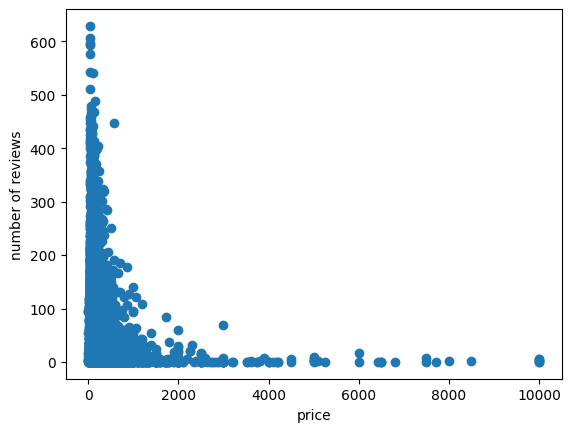

In [182]:
plt.scatter( x = df['price'], y = df['number_of_reviews'])
plt.xlabel('price')
plt.ylabel('number of reviews')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

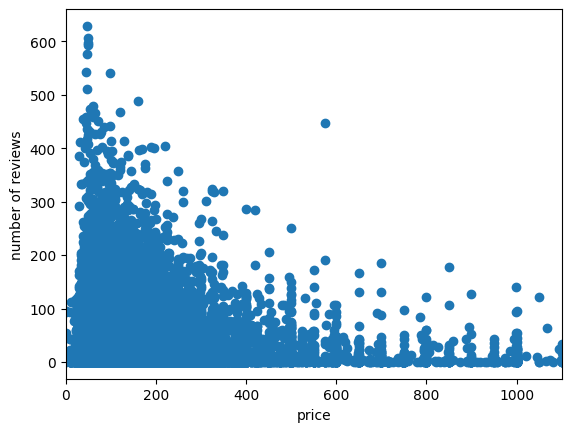

In [183]:
# change x asis 
plt.scatter( x = df['price'], y = df['number_of_reviews'])
plt.xlabel('price')
plt.ylabel('number of reviews')
plt.xlim(0,1100)
plt.show

In [184]:
#dataset sorted by attribute  top 10 
df.sort_values('number_of_reviews', ascending = False).iloc[0:10]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


- **Neighbourhoods**

In [185]:
df['neighbourhood'].value_counts().iloc[:5]

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Name: neighbourhood, dtype: int64

In [186]:
df['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

<AxesSubplot: ylabel='neighbourhood'>

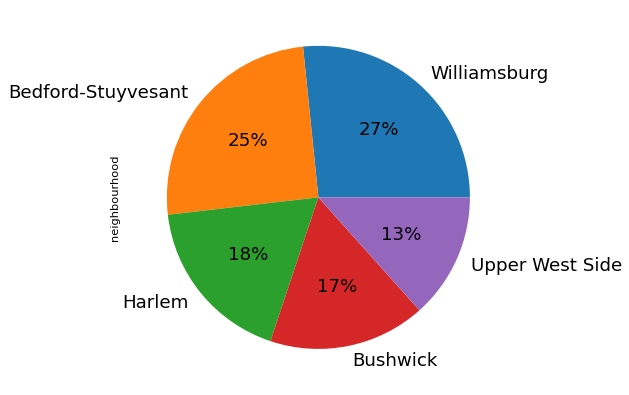

In [187]:
fig = plt.figure(figsize=(6,6), dpi=82)
df['neighbourhood'].value_counts().iloc[:5].plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=16)

We can see that Williamsburg is the hottest area of transaction followed by Bedford-Stuyvesant

- **Price**

In [188]:
df.price.value_counts().iloc[:10]

100    2051
150    2047
50     1534
60     1458
200    1401
75     1370
80     1272
65     1190
70     1170
120    1130
Name: price, dtype: int64

<AxesSubplot: >

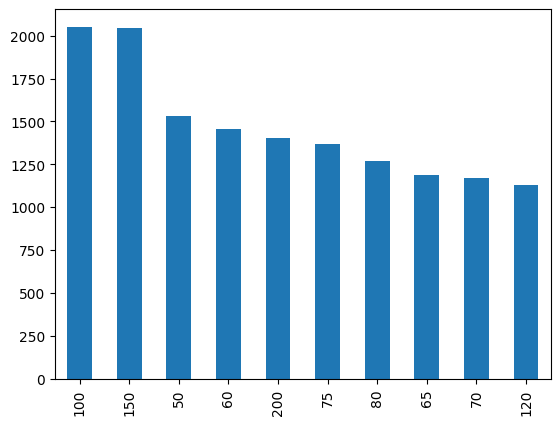

In [189]:
df.price.value_counts().iloc[:10].plot(kind = 'bar')

Almost 2 thousand plus airbnb's has a price of 100 dollars and 150 dollars each and 1.5k airbnb's have around 50 dollars price.

In [190]:
df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

The average pricing is around 152 dollars, 50% of data has price greater than 106 dollars and the costliest airbnb has around 10k dollars as price.

In [191]:
df[df['price'] == 10000.000000]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
9151,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,0.04,1,0
17692,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,0.16,1,0
29238,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,0.00,1,83


We have 3 airbnb's with 10k per night luxury stay, one private room and 2 home stay.



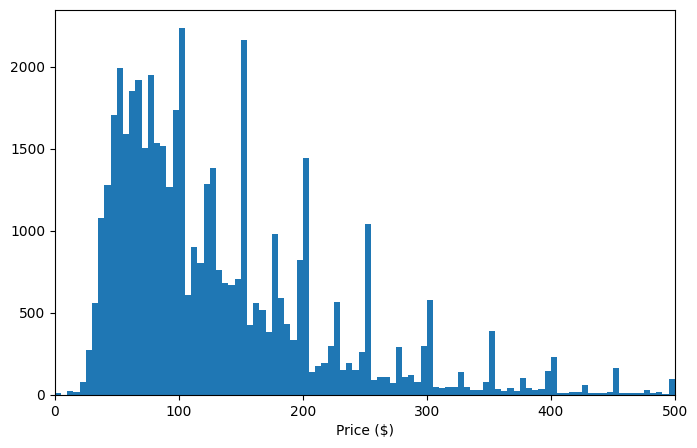

In [192]:
# investigating further on an even smaller bin size
binsize =5
bins = np.arange(0, df['price'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'price', bins = bins)
plt.xlim([0,500])
plt.xlabel('Price ($)')
plt.show()

The Price is rightly skewed with a lot of properties with prices on the low end and a few on the high price end

- **Minimum Nights**

In [193]:
df['minimum_nights'].value_counts()

1      12720
2      11696
3       7999
30      3760
4       3303
       ...  
186        1
366        1
68         1
87         1
36         1
Name: minimum_nights, Length: 109, dtype: int64

In [194]:
for i in range(1,11):
  print("Number of nights: ",i)
  print("Amount of trasactions:",len(df[df['minimum_nights'] == i]))

Number of nights:  1
Amount of trasactions: 12720
Number of nights:  2
Amount of trasactions: 11696
Number of nights:  3
Amount of trasactions: 7999
Number of nights:  4
Amount of trasactions: 3303
Number of nights:  5
Amount of trasactions: 3034
Number of nights:  6
Amount of trasactions: 752
Number of nights:  7
Amount of trasactions: 2058
Number of nights:  8
Amount of trasactions: 130
Number of nights:  9
Amount of trasactions: 80
Number of nights:  10
Amount of trasactions: 483


<AxesSubplot: >

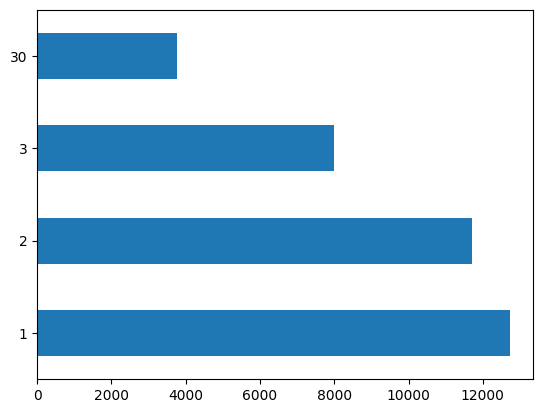

In [195]:
df['minimum_nights'].value_counts().iloc[:4].plot(kind = 'barh')

We can observe that most of almost 12k people used 1 night stay in airbnb and 11k people choose 2 night stay while 7k choose 3 night stay or Almost 3.7k stayed atleast a month.

<AxesSubplot: >

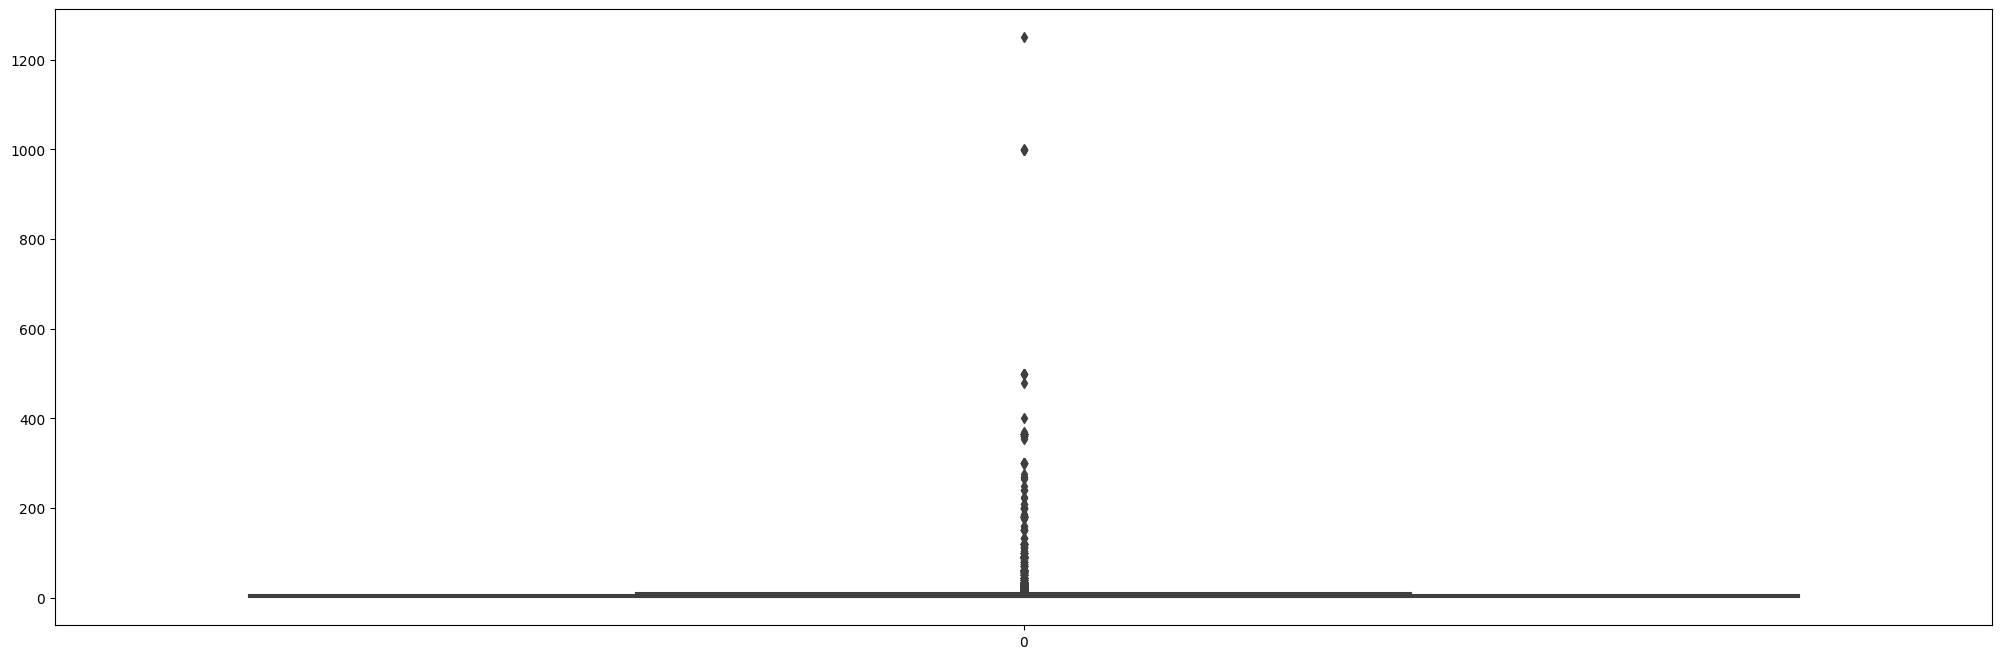

In [196]:
plt.figure(figsize = (25, 8))
sns.boxplot(df['minimum_nights'])
    
## can see some extreme outliers

In [197]:
#check how many listings have minimum nights set to more than a year
df.loc[df['minimum_nights'] > 365]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1305,Brooklyn,Bushwick,40.70202,-73.92402,Entire home/apt,115,370,6,0.09,1,365
2854,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,0.00,1,362
5767,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,0.03,1,365
7355,Queens,Long Island City,40.75104,-73.93863,Entire home/apt,134,500,30,0.57,1,90
8014,Manhattan,Harlem,40.82135,-73.95521,Entire home/apt,75,500,0,0.00,1,362
10829,Queens,Long Island City,40.74654,-73.95778,Entire home/apt,199,480,0,0.00,1,365
11193,Brooklyn,Crown Heights,40.67255,-73.94914,Private room,50,500,10,0.22,1,365
13404,Manhattan,Harlem,40.82915,-73.94034,Entire home/apt,99,999,2,0.07,1,42
14285,Brooklyn,Kensington,40.64779,-73.97956,Private room,45,500,0,0.00,1,358
15946,Manhattan,Midtown,40.74513,-73.98475,Entire home/apt,250,366,0,0.00,1,365


Given that having minimum nights as more than 365 days is extremely rare and could be invalid at times as well, we can remove them. Furthermore, its only a few entries, so it should not affect our data.


In [198]:
# Therefore, we will only consider listings that have minimum nights set to a year or less.
df = df.loc[df['minimum_nights'] <= 365]

<AxesSubplot: >

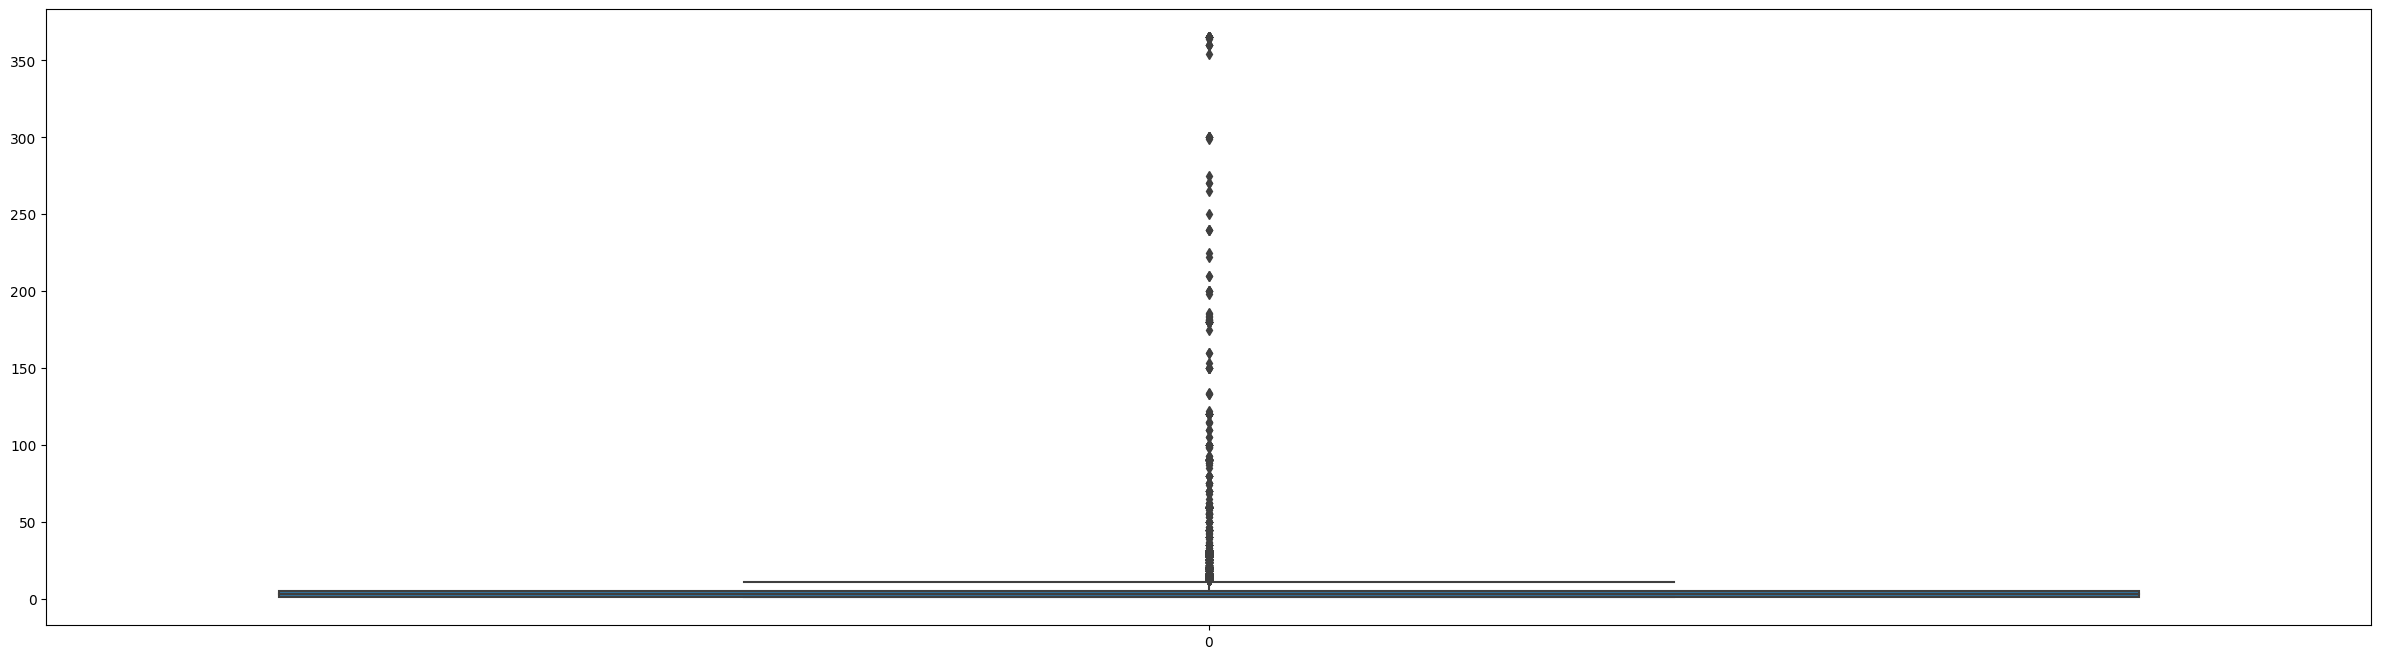

In [199]:
plt.figure(figsize = (30, 8))
sns.boxplot(df['minimum_nights'])

We can see there are no any extreme outliers


- **Number of reviews**

In [200]:
df['number_of_reviews'].value_counts()

0      10044
1       5244
2       3463
3       2520
4       1994
       ...  
313        1
540        1
480        1
326        1
341        1
Name: number_of_reviews, Length: 394, dtype: int64

10k airbnb's don't have any reviews and 5.2k has around 1 review and the maximum number of reviews is 607 which only 1 airbnb has.

In [201]:
df[df['number_of_reviews'] == 607]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
2031,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293


See, Bedroom in Manhattan gets the highest reviews and it costs around 49 dollars

- **Availablity**

In [202]:
df['availability_365'].value_counts()

0      17533
365     1289
364      491
1        408
89       361
       ...  
195       26
183       24
196       24
181       23
202       20
Name: availability_365, Length: 366, dtype: int64

Around 1.3k airbnbs have 365 days availablity 

In [203]:
df[df['availability_365'] == 365].describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.0
mean,40.729048,-73.943157,251.235842,16.615206,10.254461,0.542925,13.214895,365.0
std,0.057885,0.059883,551.717219,42.309154,22.140372,0.982189,36.298917,0.0
min,40.507080,-74.242850,20.000000,1.000000,0.000000,0.000000,1.000000,365.0
25%,40.687930,-73.983120,72.000000,1.000000,0.000000,0.000000,1.000000,365.0
50%,40.730990,-73.954140,125.000000,3.000000,2.000000,0.120000,2.000000,365.0
75%,40.762130,-73.921660,225.000000,30.000000,10.000000,0.630000,7.000000,365.0
max,40.893740,-73.721730,9999.000000,365.000000,183.000000,8.940000,327.000000,365.0


the Costliest airbnb with 365 days availablity costs around 10k dollars with average of 251 dollars

- **Reviews per month**

In [204]:
df[df['reviews_per_month'] > 1].reviews_per_month.value_counts().sum() 

15907

15.9k reviews we have above 1

In [205]:
df[df['reviews_per_month'] > 1]['reviews_per_month'].value_counts().iloc[:5]   

2.00    406
3.00    222
4.00    130
1.15     90
1.05     88
Name: reviews_per_month, dtype: int64

Around 406 airbnb have 2 reviews per month and 222 have 3 reviews per month or 130 have 4.

In [206]:
df['reviews_per_month'].max()

58.5

In [207]:
df[df['reviews_per_month'] == 58.5]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
42075,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,58.5,9,299


In Manhattan has the highest reviews per month and they offer Private room that worth 100 dollars per night

- **Calculate host listing**

In [208]:
df.calculated_host_listings_count.value_counts().iloc[:5]

1    32290
2     6658
3     2853
4     1440
5      845
Name: calculated_host_listings_count, dtype: int64

<AxesSubplot: >

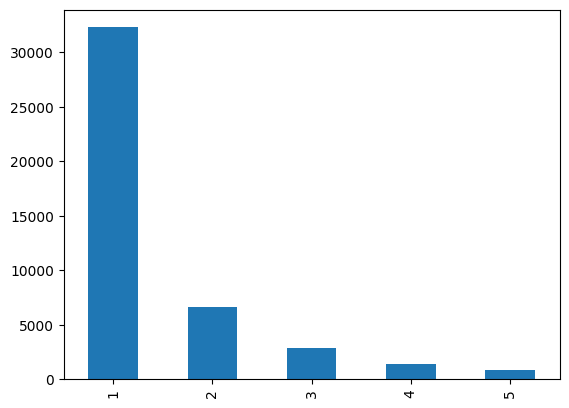

In [209]:
df.calculated_host_listings_count.value_counts().iloc[:5].plot(kind = 'bar')

Based on the data, it appears that a majority of Airbnb hosts only used their listings once, with around 32,300 hosts falling into this category. Additionally, around 6,600 hosts used their listings twice. This suggests that many hosts may be using Airbnb as a one-time source of income or as a way to supplement their income on a sporadic basis.

In [210]:
df.calculated_host_listings_count.describe()

count    48881.000000
mean         7.145639
std         32.957085
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

On an average, a host has used listings 7 times and Maximum times they used 327 times.

## **Bivariate Analysis**

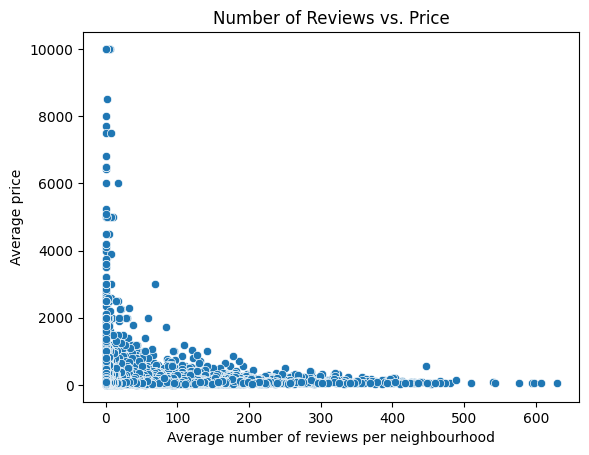

In [211]:
#plot scatter plot
sns.scatterplot(y='price',x='number_of_reviews', data=df)

#set titles and labels
plt.title("Number of Reviews vs. Price",);
plt.xlabel('Average number of reviews per neighbourhood')
plt.ylabel('Average price');

C:\Users\Kartik Dhiman\AppData\Local\Temp\ipykernel_17000\935792796.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

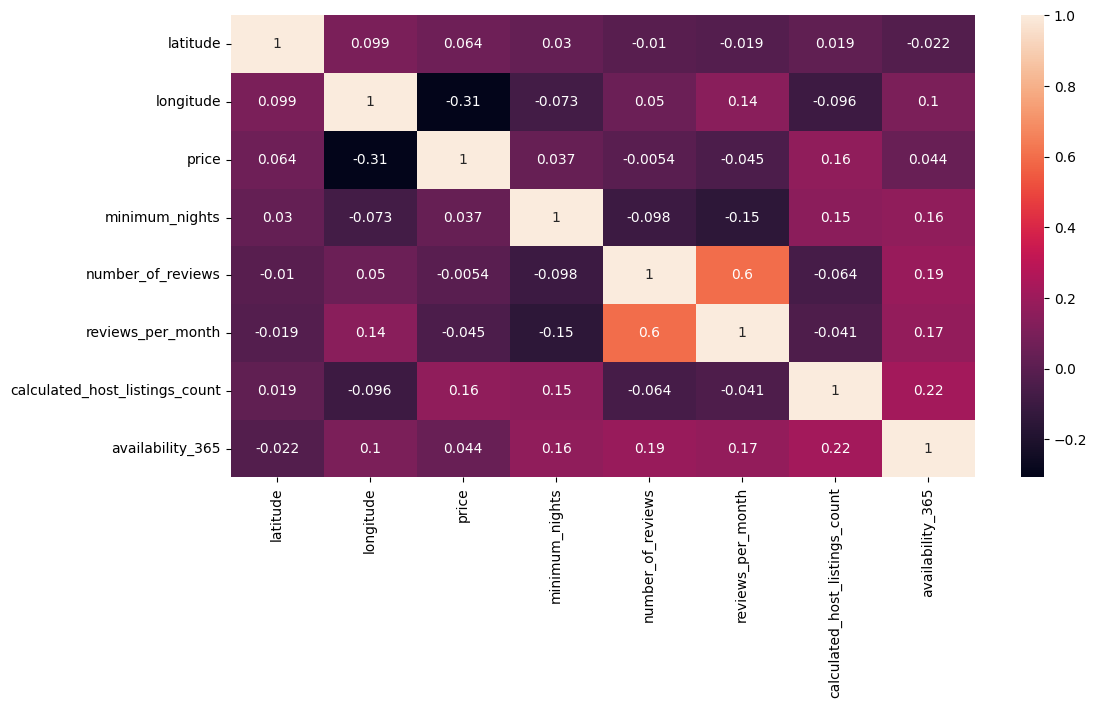

In [238]:
corr = df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True)

In [213]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [240]:
# create function so that it can be reused as a base for map
# visualize the amount of listing clusters in NYC
import folium as fl
from folium.plugins import PolyLineTextPath
from folium.plugins import HeatMap


def draw_map():
    nyc = [df.latitude.mean(), df.longitude.mean()]
    boroughs = df.groupby('neighbourhood_group').mean().reset_index()
    boroughs_name = boroughs['neighbourhood_group'].values.tolist()
    boroughs_loc = boroughs[['latitude', 'longitude']].values.tolist()

    base_map = fl.Map(location = nyc, control_scale = True, zoom_start = 11, tiles = 'OpenStreetMap')

    for i in range(len(boroughs_name)):
        attr = {'fill': 'midnightblue', 'font-weight': 'bold', 'font-size': '20'}
        pl = fl.PolyLine([[boroughs_loc[i][0], boroughs_loc[i][1]-.1], [boroughs_loc[i][0], boroughs_loc[i][1]+.1]], weight = 15, color = 'rgb(255,255,255, 0)')
        base_map.add_child(pl)
        base_map.add_child(PolyLineTextPath(pl, text = boroughs_name[i], attributes = attr, center = True))
    
    return base_map

base_map = draw_map()    
base_map.add_child(HeatMap(data = df[['latitude', 'longitude']], min_opacity = 0.2, radius = 15, blur = 30))
base_map.add_child(fl.ClickForMarker(popup='High amount of listings'))

## Manhattan and Brooklyn have the most amount of listing options available

C:\Users\Kartik Dhiman\AppData\Local\Temp\ipykernel_17000\1586737894.py:10: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



### Neighbhourhood locations

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

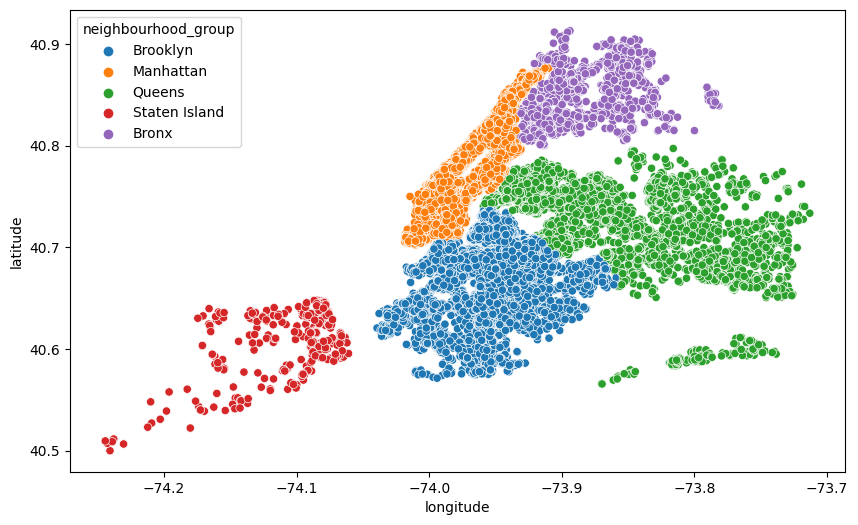

In [215]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group')


this shows us the dataset distribution in NewYork city with respect to latitude and longitude.

In [216]:
df['room_type'].value_counts()

Entire home/apt    25400
Private room       22322
Shared room         1159
Name: room_type, dtype: int64

### Room Type

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

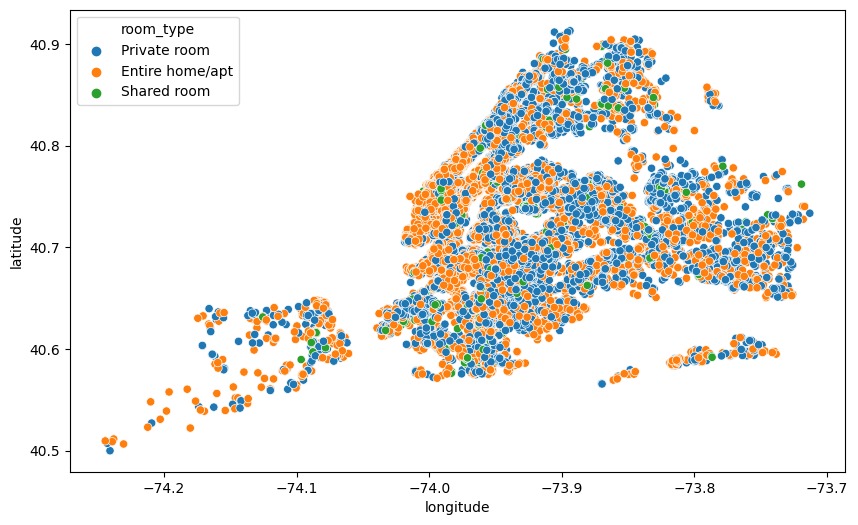

In [217]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='room_type')


### Availability 365 Days

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

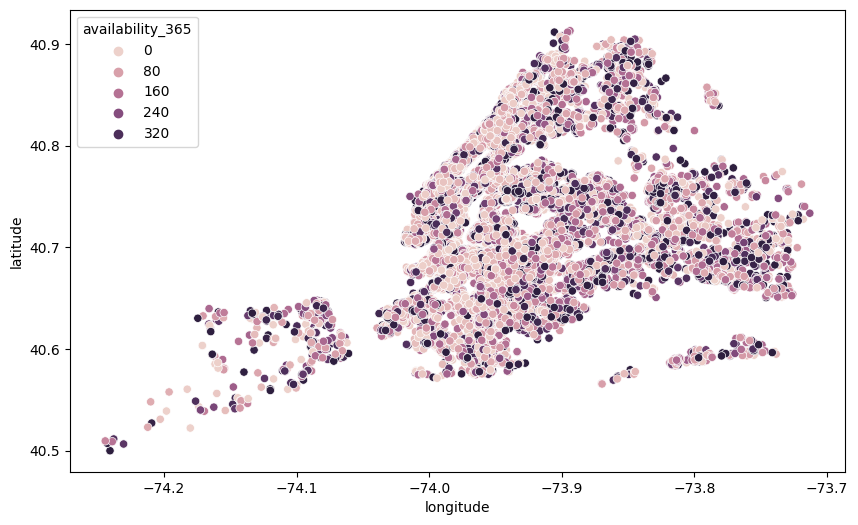

In [218]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='availability_365')


<AxesSubplot: xlabel='room_type', ylabel='count'>

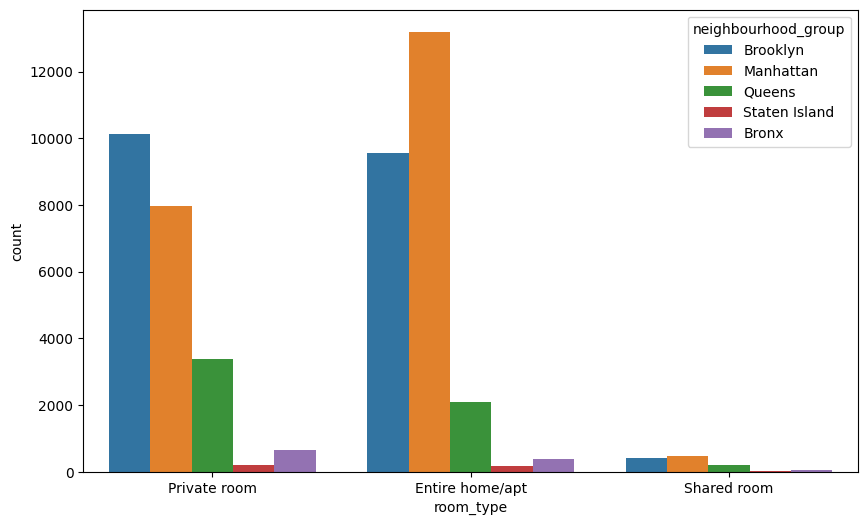

In [219]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'room_type', hue = 'neighbourhood_group')

Based on the data, it seems that the home service is the most commonly used type of rental on Airbnb, especially in Manhattan where it is the highest-used service. It is also the highest-used service across all of New York City. In Brooklyn, on the other hand, private rooms were more commonly used.

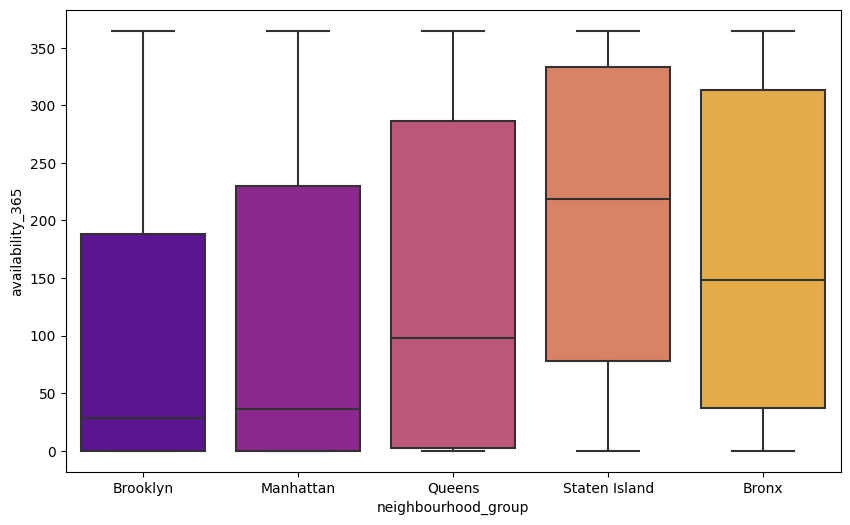

In [220]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette='plasma')

Staten Island have the highest average airbnb availablity

In [221]:
df['neighbourhood'].value_counts().iloc[:10]

Williamsburg          3918
Bedford-Stuyvesant    3713
Harlem                2656
Bushwick              2464
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1563
Midtown               1544
Name: neighbourhood, dtype: int64

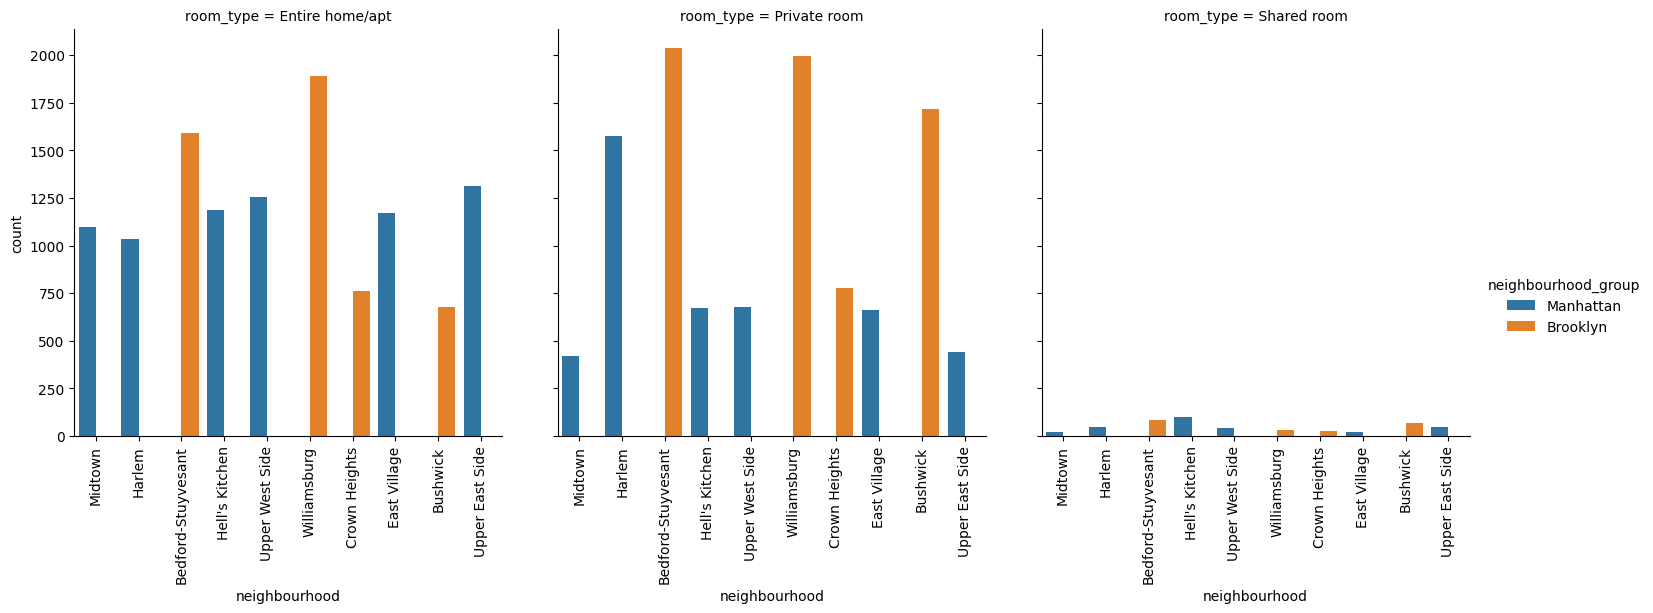

In [222]:
neighb =df.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick','Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
pl =sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=neighb, kind='count')
pl.set_xticklabels(rotation=90)

<AxesSubplot: >

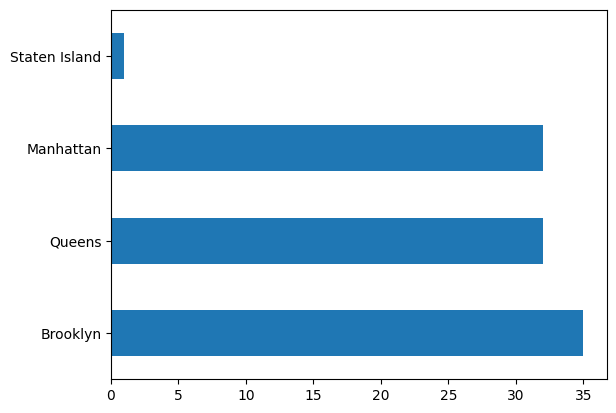

In [223]:
# Rooms with top 100 reviews by neighbourhood
dfr=df.sort_values(by=['number_of_reviews'],ascending=False).head(100)
dfr['neighbourhood_group'].value_counts().plot(kind = 'barh')

if we look at the top 100 airbnb's with number of reviews, Brooklyn has highest reviews followed by Queens and Manhattan.

<AxesSubplot: >

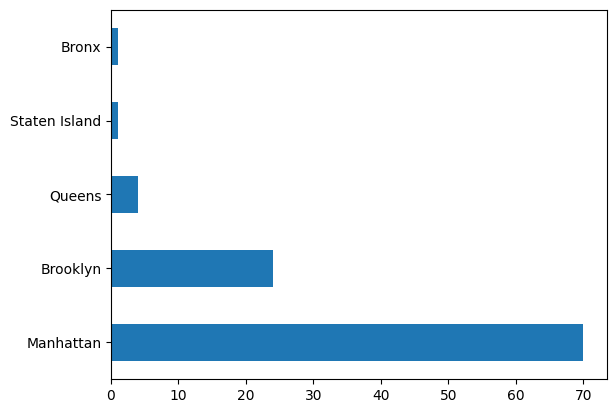

In [224]:
# Rooms with top 100 expensive by neighbourhood
dfr=df.sort_values(by=['price'],ascending=False).head(100)
dfr['neighbourhood_group'].value_counts().plot(kind = 'barh')

If we take the top 100 airbnbs then almost 70+ comes in Manhattan, followed by 25 in Brooklyn.

<AxesSubplot: >

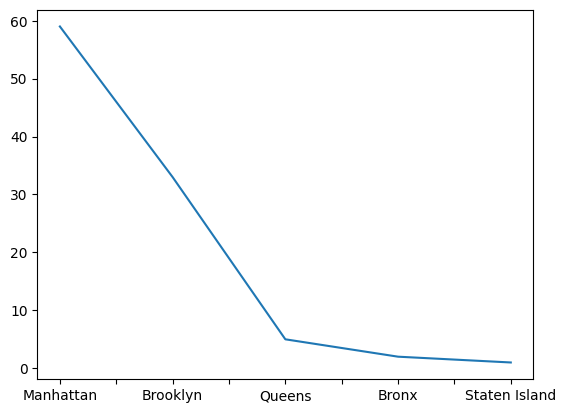

In [225]:
# Rooms with top 100 minimum_nights  by neighbourhood
dfr=df.sort_values(by=['minimum_nights'],ascending=False).head(100)
dfr['neighbourhood_group'].value_counts().plot()

Manhattan has highest airbnbs with highest minimum nights.

## **Hypothesis Testing 🧪**

- Null hypothesis: There is no significant difference in rental prices between room type and neighbourhood group
- Alternative hypothesis: There is a significant difference in rental prices between room type and neighbourhood group

In [226]:
import scipy.stats as stats

In [227]:
# subset the data into groups based on room_type and neighbourhood_group
grouped_data = df.groupby(['room_type', 'neighbourhood_group'])['price'].mean().reset_index()

# print the grouped data
print(grouped_data)


          room_type neighbourhood_group       price
0   Entire home/apt               Bronx  127.506596
1   Entire home/apt            Brooklyn  178.338181
2   Entire home/apt           Manhattan  249.257466
3   Entire home/apt              Queens  147.031996
4   Entire home/apt       Staten Island  173.846591
5      Private room               Bronx   66.788344
6      Private room            Brooklyn   76.508195
7      Private room           Manhattan  116.776622
8      Private room              Queens   71.762456
9      Private room       Staten Island   62.292553
10      Shared room               Bronx   59.800000
11      Shared room            Brooklyn   50.527845
12      Shared room           Manhattan   88.933194
13      Shared room              Queens   69.020202
14      Shared room       Staten Island   57.444444


We can see the mean price for each combination of room_type and neighbourhood_group.

## **T-Test**

- To perform the t-test, we need to compare the mean prices of each group. We can use the ttest_ind function from the scipy.stats library to perform an independent t-test between two groups.

- Let's first extract the data for the two groups we want to compare, which are "Entire home/apt" in Manhattan and "Private room" in Brooklyn:

In [228]:
# extract the data for the two groups
group1 = df[(df['room_type'] == 'Entire home/apt') & (df['neighbourhood_group'] == 'Manhattan')]['price']
group2 = df[(df['room_type'] == 'Private room') & (df['neighbourhood_group'] == 'Brooklyn')]['price']


**Now we can perform the t-test**

In [229]:
# perform t-test
t, p = stats.ttest_ind(group1, group2, equal_var=False)

# print the t and p values
print('T-Test Results:')
print('t-value =', t)
print('p-value =', p)


T-Test Results:
t-value = 54.94627912775757
p-value = 0.0


- the t-test indicates that the calculated t-value is 54.95 and the p-value is 0.0. 

- **Since the p-value is less than the standard significance level of 0.05, we can reject the null hypothesis and conclude that there is a significant difference in rental prices between the room types and neighborhood groups. In other words, the difference in rental prices between at least one pair of room type and neighborhood group is statistically significant.**

## **ANOVA**

- To perform ANOVA, we need to compare the mean prices of all groups. We can use the f_oneway function from the scipy.stats library to perform ANOVA.

In [230]:
# subset the data into groups based on room_type and neighbourhood_group
grouped_data = df.groupby(['room_type', 'neighbourhood_group'])['price'].apply(list).reset_index()

# perform ANOVA
f, p = stats.f_oneway(*grouped_data['price'])

# print the F and p values
print('ANOVA Results:')
print('F-value =', f)
print('p-value =', p)


ANOVA Results:
F-value = 318.01508864877337
p-value = 0.0


- Based on the ANOVA test results, the p-value is extremely small (less than the conventional alpha level of 0.05), indicating that there is a significant difference in rental prices between room types and neighborhood groups. The F-value of 318.01508864877337 also indicates that the differences in the means of the groups are significant. This means that at least one of the group means is significantly different from the others.

- **So, we can reject the null hypothesis and conclude that there is a significant difference in rental prices between room types and neighborhood groups.**

## **Outlier Removal💣**

We can first see the box plot of the price and find some outliers and remove them so that we can do better in further steps

In [231]:
import plotly.express as px
fig = px.box(df, y="price")
fig.update_layout(
    autosize=False,
    width=500,
    height=400
)
fig.show()

Here, we can see that there are a lot of outliers taking up the data, it could be expensive Airbnbs, but there are a very few of them compared to data and it overall has a huge impact and must be removed

<AxesSubplot: >

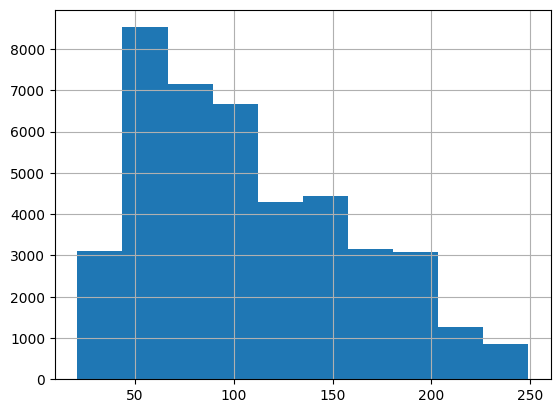

In [232]:
dfp = df["price"][df["price"] < 250]

dfp[dfp > 20].hist()

After experimenting around values the range of (20,250) has a good gaussian wise distribution and hence we can go ahead with data in this range and remove others as outliers.

In [233]:
df=df[df["price"]<250]
df=df[df["price"]>20]
df['room_type'].value_counts()

Private room       21718
Entire home/apt    19763
Shared room         1089
Name: room_type, dtype: int64

In [234]:
fig = px.box(df, y="price")
fig

There is no outlier present we can easily go for the next step.

### **Main Insights**

- Manhattan and Brooklyn have the most listings and customers.
- Private rooms and Entire homes are the most common listings while Shared rooms are much less.
- a)Entire homes normally cost around 160 dollars.<br>
  b) Private rooms cost around 70 dollars.<br>
  c) Shared rooms cost around 45 dollars.<br>
 Manhattan has the most expensive listings while Staten Island has the cheapest listings.
- Although Manhattan and Brooklyn have the most listings & customers, Staten Island has the busiest hosts, particularly in Silver Lake, Eltingville and Richmondtown. This is due to less competition, very low costs compared to other boroughs and less minimum night requirements which drives more customers.
- There is no significant difference for reviews_per_month between hosts of 'shared rooms' and 'private rooms' (with a 95% confidence)

##### **Future Work**
 - We can fit the models and make predictions
 - we can deploy this model using flask and stream 
 
 **Kartik Dhiman**